# Árboles de decisión

es un árbol de clasificación binaria (como los árboles de Huffman) construído de manera top-down.  
Para un conjunto de observaciones de entrenamiento se va partiendo el dataset en dos recursivamente hasta llegar a una condición de conjunto mínimo. Explicación en el pizarrón.

https://www.youtube.com/watch?v=7VeUPuFGJHk

https://www.youtube.com/watch?v=DCZ3tsQIoGU

## Ganancia de Información

$$ IG=H(S)-\sum_v \frac{|S_v|}{|S|} H(S_v) $$

## Gini impurity

Utilizado por el algoritmo de CART (Árboles de Clasificación y Regresión), la impureza de Gini es una medida de cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. La impureza de Gini se puede calcular sumando la probabilidad de cada elemento siendo elegido multiplicado por la probabilidad de un error en la categorización de ese elemento. Alcanza su mínimo (cero) cuando todos los casos del nodo corresponden a una sola categoría de destino.

Para calcular la impureza de Gini de un conjunto de elementos, supongamos i toma valores en $\{1, 2, ..., m\}$, y sea $f_i$ la fracción de artículos etiquetados con valor $i$ en el conjunto.

$$I_{G}(f) = \sum_{i=1}^{m} f_i (1-f_i) = \sum_{i=1}^{m} (f_i - {f_i}^2) = \sum_{i=1}^m f_i - \sum_{i=1}^{m} {f_i}^2 = 1 - \sum^{m}_{i=1} {f_i}^{2}$$


## Desventaja

* Se pueden crear árboles muy complejos que no generalizan bien ya que se toman en cuenta muchos casos particulares. Se soluciona con pruning. No implementado en sklearn.


## Ventajas
* Interpretabilidad
* Poca preparación de datos (no hace falta normalización, por ej)
* La predicción es muy rápida

# El dataset de Iris

- Es un conjunto de datos multivariante introducido por Ronald Fisher en su articulo de 1936: "The use of multiple measurements in taxonomic problems" como un ejemplo de análisis discriminante lineal.

- El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). 

- Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

In [124]:
# MV correr esto en Collab
!wget https://raw.githubusercontent.com/lab-ml-itba/Arboles-de-decision/master/helper_DT.py

/bin/bash: wget: command not found


In [125]:
# % load_ext autoreload
# % autoreload 2
import helper_DT
# MV: Dado que éste es un dataset clásico, SKLearn lo tiene incorporado 
# entre sus archivos y contiene un método para cargar los datos
# Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [126]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [127]:
print(type(iris))
print(type(iris['data']))

print(iris["data"][0]) # MV: ndarray
print(iris["target"][0]) # MV: ndarray
print(iris["target_names"]) # MV: list
print(iris["feature_names"]) # MV: list
print(iris["filename"])
print(iris["DESCR"])

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
[5.1 3.5 1.4 0.2]
0
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
/Users/marcelovolta/anaconda3/envs/dand37/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ===========

In [128]:
# MV para comprobar los targets
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [129]:
X = iris["data"] 
y= iris["target"]
from sklearn.model_selection import train_test_split 

# MV: train_test_split usa para dividir el dataset en train y test 
# Se puede proveer el test_size o el train_size
# Random state steado en un entero permite tener corridas reproducibles: todas las corridas van a splittear del mismo modo
# Stratify: Permite obtener train y test con una cantidad balanceada de los elementos que se usen para estratificar
# en este caso lo separan por medio de los targets, lo que garantiza un número balanceado de cada uno de los targets
# Ref. de train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split
# Ref. de Stratification: https://scikit-learn.org/stable/modules/cross_validation.html#stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


Train Score: 0.9821428571428571
Test Score: 0.9210526315789473


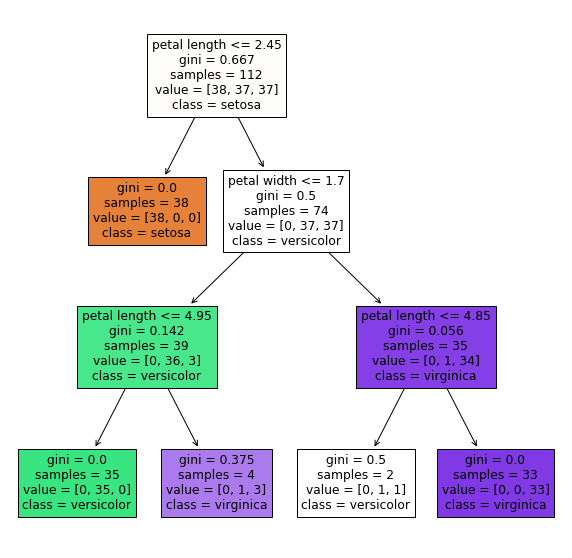

In [130]:
# MV: Usando impureza de Gini para medir la calidad de un split, decidiendo en base a la mejor opción
# con una profundidad máxima de 3
clf = tree.DecisionTreeClassifier(criterion="gini",
                                 splitter="best",
                                 max_depth=3)
clf = clf.fit(X_train, y_train)
print("Train Score: {}".format(clf.score(X_train,y_train)))
print("Test Score: {}".format(clf.score(X_test,y_test)))
plt.figure(figsize=[10,10])
# Disponible en la versión 0.21.3 de sklearn
out=tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["sepal length","sepal width","petal length","petal width"],
                   class_names=iris["target_names"],
                   filled=True,
                   impurity=True,
                   proportion=False)

In [133]:
'''
MV: Esta celda la agrego para ver como quedan los boundaries que se usan más adelante
No se puede por el número de features, tendría que re-armar o bien la función para acomodar 4 features, o bien 
 cortar el dataset usando sólo petal_length y patel_width que son las dos variales que se usan, para poder
 graficar. 
 Hago esto para entender qué información me dan esas zonas
 Tengo tres clases! Queda para después, tengo que buscar un ejemplo mejor
'''
new_X_train = X_train[:, 2:4]

print(new_X_train)
#helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=112)



[[6.1 1.9]
 [6.7 2. ]
 [3.7 1. ]
 [4.  1.3]
 [4.  1.3]
 [6.  2.5]
 [1.4 0.3]
 [4.9 1.8]
 [1.6 0.2]
 [4.8 1.8]
 [1.9 0.4]
 [5.3 1.9]
 [3.5 1. ]
 [1.4 0.2]
 [1.5 0.1]
 [3.9 1.2]
 [5.8 1.6]
 [1.4 0.3]
 [1.5 0.4]
 [3.9 1.4]
 [4.7 1.4]
 [4.9 1.5]
 [1.5 0.2]
 [3.6 1.3]
 [5.2 2.3]
 [1.4 0.2]
 [5.9 2.3]
 [4.4 1.3]
 [5.7 2.3]
 [1.4 0.2]
 [1.5 0.2]
 [4.7 1.5]
 [1.5 0.1]
 [5.1 1.5]
 [1.4 0.1]
 [1.9 0.2]
 [4.1 1.3]
 [1.5 0.2]
 [4.5 1.5]
 [1.1 0.1]
 [1.4 0.1]
 [4.2 1.2]
 [5.1 2.4]
 [5.1 1.9]
 [1.6 0.2]
 [5.1 2. ]
 [4.3 1.3]
 [1.5 0.3]
 [5.5 2.1]
 [1.6 0.2]
 [5.6 2.1]
 [6.7 2.2]
 [1.3 0.4]
 [4.6 1.5]
 [5.  1.9]
 [6.4 2. ]
 [4.4 1.4]
 [4.9 1.5]
 [1.3 0.2]
 [5.1 1.6]
 [4.2 1.3]
 [6.1 2.3]
 [4.5 1.5]
 [5.6 1.8]
 [1.3 0.3]
 [3.8 1.1]
 [1.4 0.2]
 [5.9 2.1]
 [4.8 1.4]
 [6.6 2.1]
 [3.5 1. ]
 [5.7 2.5]
 [5.6 2.4]
 [1.6 0.4]
 [5.7 2.1]
 [4.6 1.3]
 [1.3 0.2]
 [5.3 2.3]
 [1.5 0.2]
 [5.5 1.8]
 [4.1 1. ]
 [4.2 1.5]
 [1.6 0.2]
 [5.1 1.8]
 [6.1 2.5]
 [1.6 0.2]
 [1.6 0.6]
 [5.4 2.1]
 [5.1 1.9]
 [4.5 1.3]
 [6.  1.8]


## Feature importance

Es una medida de cuánto ayuda a reducir la impureza cada uno de los features utilizados. Se utiliza para hacer selección de features.
Se calcula de la siguiente forma:

para cada nodo $j$ se calcula la importancia del nodo ($ni$):

$$ ni_j=w_j * C_j-w_{left_j} * C_{left_j} - w_{right_j} * C_{right_j} $$

Donde:

$ni_j$: Importancia del nodo $j$  
$w_j$: Proporción de las muestras que caen en el nodo $j$  
$C_j$: Impureza del nodo $j$  
$left_j$: hijo izquierdo del nodo $j$  
$right_j$: hijo derecho del nodo $j$

una vez calculados los $ni_j$ para cada nodo se calcula el feature importance para el feature $i$ de la siguiente manera:

$$fi_i=\frac{\sum_{j \in \text{nodos en los que se usa i para hacer el split}}{ni_j}}{\sum_{j \in \text{todos los nodos}}{ni_j}}$$

In [102]:
# MV: Esta es la importancia del nodo 1 -> 74/112 = 0.661 que está anotado en el árbol pw debe ser por petal_width
# Lo que está haciendo en estas celdas en calcular el fi a mano y después compararlo con lo que da en SKLearn
pw_1=0.667-0.5*74/112
print(pw_1)

0.3366428571428572


In [103]:
 
pl_1=0.142*39/112-4/112*0.375


In [104]:
pl_2=0.056*35/112-2/112*0.5

In [105]:
pw_2=0.5*74/112-(39/112*0.142+35/112*0.056)

In [106]:
fi_pw=pw_1+pw_2
fi_pl=pl_1+pl_2

In [107]:
fi_pw/(fi_pw+fi_pl)

0.9307794582017617

In [108]:
fi_pl/(fi_pw+fi_pl)

0.06922054179823829

In [109]:
'''
MV: Yo lo voy a calcular a mi manera
ni_1 es node importance del nodo 1
Cuento los nodos de arriba hacia abajo, de izquierda a derecha
Ojo con esto: Usando los % que vinieron en el árbol construido con Proportion=true, 
los parámetros no me dan muy bien por la aproximación, construí estos contadores de abajo. 
Pero con un árbol grande hay que concantenar cada vez más, así que 
puse Proportion=False y usé los números de samples que se muestran en cada nodo 
en lugar del %
Estos son los contadores que había usado: 
muestras_nodo_3 = np.count_nonzero(X_train[:,3]<=4.85)/len(X_train)
muestras_nodo_4 = np.count_nonzero(np.logical_and(X_train[:,3]<=4.85,X_train[:,2]<=1.65))/len(X_train)

''' 

ni_1 = (1.0 * 0.667) - (0.5 * 74/112) # petal_width
ni_3 = (0.5 * 74/112) - (0.056 * 35/112) - (0.142 *39/112) # petal_length
ni_4 = (0.056 * 35/112) - (0.5 * 2/112) # petal_width
ni_5 = (0.142 *39/112) - (0.5 * 6/112) # petal width

petal_length_fi =(ni_1 + ni_3)/(ni_1 + ni_3 + ni_4 + ni_5)
petal_width_fi = (ni_4 + ni_5)/(ni_1 + ni_3 + ni_4 + ni_5)


print(petal_length_fi)
print(petal_width_fi)

# feature_names=["sepal length","sepal width","petal length","petal width"]

0.9505261371350985
0.04947386286490155


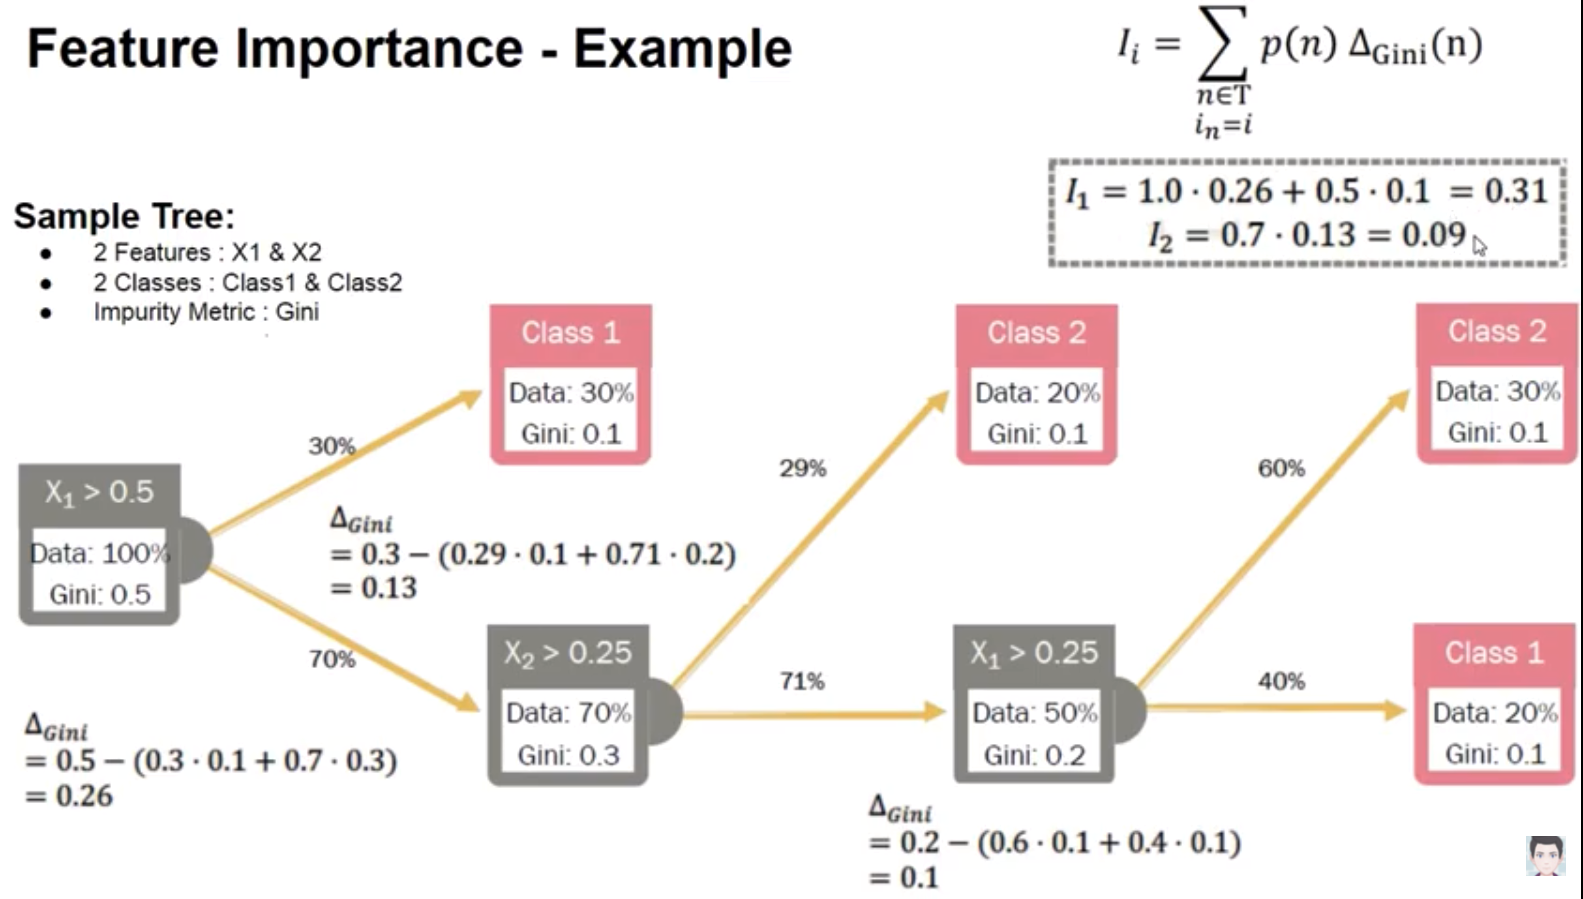

In [112]:
'''
De otro modo. Éste tomado de: https://www.youtube.com/watch?v=qC3PRqHqnfE
(Ver la imagen de arriba)
Se basa en el cálculo de Delta Gini = Gini del Nodo Padre - Suma(Proporción muestras nodo hijo * Gini nodo hijo)
Finalmente, para cada Nodo, se multiplica el Delta Gini por la proporción de muestras que cae en el nodo
(con respecto al número total de muestras)
Eso da el node importance, y el feature importance como antes es la suma del node importance de los nodos donde 
se use el feature para slipear, dividido por la suma de la importancia de todos los nodos, para normalizar
En los dos casos me dio igual y coincidente con lo que da la herramienta SKLearn
'''

delta_gini_nodo_1 = 0.667 - (0.5 * 74 / 112)
delta_gini_nodo_3 = 0.5 - (0.056 * 35/74) - (0.142 * 39/74)
delta_gini_nodo_4 = 0.056 - (0.5 * 2 / 35)
delta_gini_nodo_5 = 0.142 - (0.5 * 6 / 39)

ni_nodo_1 = delta_gini_nodo_1 * 1 
ni_nodo_3 = delta_gini_nodo_3 * 74 / 112
ni_nodo_4 = delta_gini_nodo_4 * 35 / 112
ni_nodo_5 = delta_gini_nodo_5 * 39 / 112

fi_petal_length = (ni_nodo_1 + ni_nodo_3)/(ni_nodo_1 + ni_nodo_3 + ni_nodo_4 + ni_nodo_5)
fi_petal_width = (ni_nodo_4 + ni_nodo_5)/(ni_nodo_1 + ni_nodo_3 + ni_nodo_4 + ni_nodo_5)

print(fi_petal_length)
print(fi_petal_width)

0.9505261371350985
0.049473862864901554


In [111]:
clf.feature_importances_

array([0.        , 0.        , 0.95073191, 0.04926809])

In [136]:
import numpy as np
'''
MV: Generación de Gaussianas usando multivariate_normal 
Esta es la signature de la función: random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
Acá debajo N0, N1 es el número de muestras
mu0, mu1 son las medias
s un valor de covarianza a partir del cual construye una matriz
Lo que hacen es construir dos Gaussianas multivariadas, cada una con dos variables (features)
Cada una de estas multivariadas es para una de las clases
Una vez generadas, las stackean verticalmente para ue queden combinadas
Entonces tengo una multivariada diferente para cada una de las dos clases
Fijate que a las dos clases le ponen la misma matriz de covarianza, ésa es la condición de aplicabñididad de LDA
Además, por cómo generaron la matriz, Naive Bayes funcionaría bien acá, la matriz de covarianzas, no sólo es la 
misma para las dos clases, sino que es diagonal
Fijate que el array de clases, y es un vector transpuesto (es decir, una fila larga que está construida con un hstack)
''' 
def generate_gaussians(N0,N1,mu0,mu1,s):
    # N1: Cantidad de personas
    sigma=[[s,0],[0,s]]
    np.random.seed(231)
    X=np.vstack([np.random.multivariate_normal(mu0, sigma,N0),np.random.multivariate_normal(mu1, sigma,N1)])
    #Modifiqué esta línea para que traiga enteros, no quiero floats en las clases. Dejo la original comentada
    #y=np.hstack([np.zeros(N0),np.ones(N1)])
    y=np.hstack([np.zeros(N0, dtype=np.int8),np.ones(N1, dtype=np.int8)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
    return X_train, X_test, y_train, y_test

In [137]:
#MV: Revisamos los datos
X_train, X_test, y_train, y_test=generate_gaussians(N0=1000,N1=1000,mu0=[2,5],mu1=[3,3],s=2)
print(X_train)
print(y_train)

[[ 0.90497598  4.40586364]
 [ 4.33761185  5.14265226]
 [ 4.08938185  2.38209853]
 ...
 [ 2.90207423  3.45753845]
 [-0.9146425   2.85450876]
 [ 2.90655607  3.93444909]]
[0 0 1 ... 0 1 1]


Train Score: 0.8365671641791045
Test Score: 0.7742424242424243


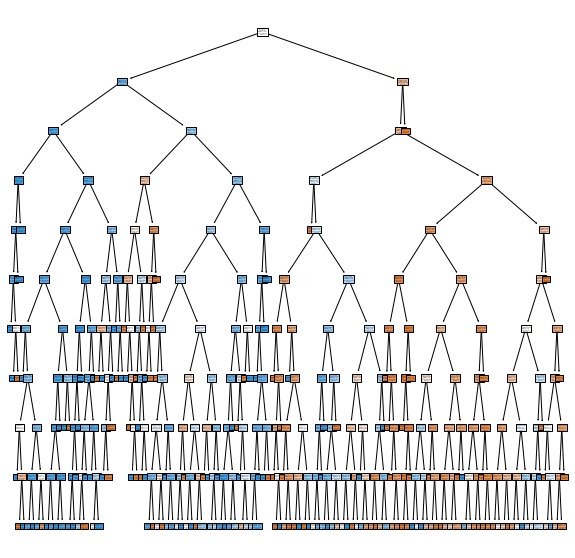

In [138]:
#MV: Aplico SKLearn. El gráfico de abajo es el mismo que obtuve para el dataset Iris, sólo que es demasiado
#extenso y los rectángulos quedan chiquitos

clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 splitter="random",
                                 max_depth=10)
clf = clf.fit(X_train, y_train)
print("Train Score: {}".format(clf.score(X_train,y_train)))
print("Test Score: {}".format(clf.score(X_test,y_test)))
plt.figure(figsize=[10,10])
# Disponible en la versión 0.21.3 de sklearn
out=tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["X1","X2"],
                   class_names=["0","1"],
                   filled=True,
                   impurity=True,
                   proportion=False)

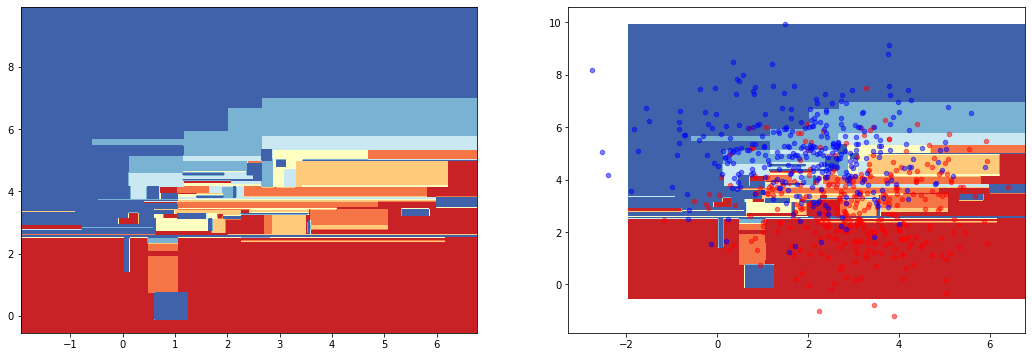

In [140]:
'''
MV: Entiendo que ésto es las zonas que se van delimitando en cada nodo del árbol
No tengo tiempo ahora de ponerme a entender el código del helper, queda como ToDo
'''

helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)

Si bien un árbol de decisión no es el clasificador óptimo para un dataset generado con gaussianas, veamos qué hiperparámetros podemos modificar para mejorar la regularización.

In [142]:
# MV: Vuelve a generar, ésta vez con más datos para poder hacer la comparación rápida con QDA 
# y el barrido de hiperparámetros (mirá más abajo)
X_train, X_test, y_train, y_test=generate_gaussians(N0=5000,N1=5000,mu0=[2,5],mu1=[3,3],s=2)

In [143]:
# MV: Crean esta función que construye el árbol de decisión con más hiperparámetros fijados en forma explícita
# Arriba se usaban sólo tres: criterion, splitter y max_depth. Acá usamos 9 

def gen_tree(X_train, y_train, X_test, y_test,
             criterion="entropy",
             splitter="best",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.,
             plot_tree=False):
    clf = tree.DecisionTreeClassifier(criterion=criterion,
                                     splitter=splitter,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     min_weight_fraction_leaf=min_weight_fraction_leaf,
                                     max_features=max_features,
                                     max_leaf_nodes=max_leaf_nodes,
                                     min_impurity_decrease=min_impurity_decrease
                                     )
    clf = clf.fit(X_train, y_train)
    print("Train Score: {}".format(clf.score(X_train,y_train)))
    print("Test Score: {}".format(clf.score(X_test,y_test)))
    helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)
    if plot_tree:
        plt.figure(figsize=[10,10])
        # Disponible en la versión 0.21.3 de sklearn
        out=tree.plot_tree(clf,
                           max_depth=20,
                           feature_names=["X1","X2"],
                           class_names=["0","1"],
                           filled=True,
                           impurity=True,
                           proportion=False)

Train Score: 1.0
Test Score: 0.6987878787878787


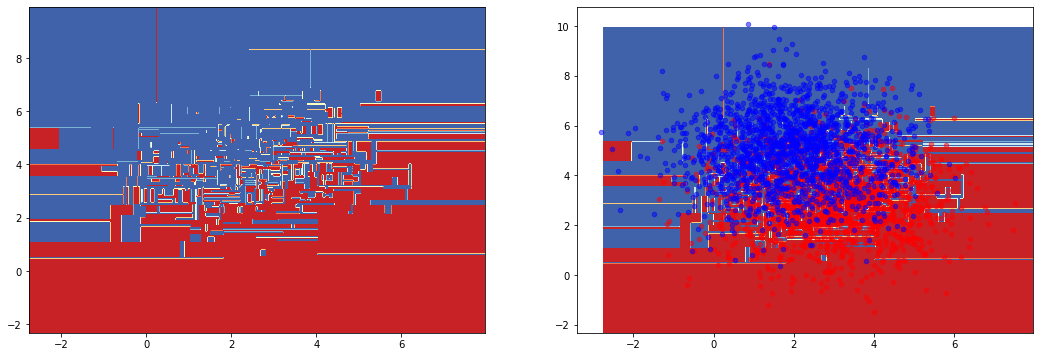

In [144]:
gen_tree(X_train, y_train, X_test, y_test,
             criterion="entropy",
             splitter="best",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.,
             plot_tree=False)

# Comparación con QDA

In [145]:
# MV: Ahora aplicamos QDA de SKLearn para comparar la performance
# Se ve que el Test Score es mejor, y que el Train Score ahora da más cercano al Test es decir se eliminó 
# el overfitting que se veía arriba, donde el Train daba 1.0

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, y_train)
print("Train Score: {}".format(clf_QDA.score(X_train,y_train)))
print("Test Score: {}".format(clf_QDA.score(X_test,y_test)))

Train Score: 0.7756716417910448
Test Score: 0.7809090909090909


In [146]:
# MV: Esta celda no estaba en el notebook original. La armo porque en el armado de los datos usó las condiciones
# que mejor se adaptan a LDA. Esto se evidencia en el hecho de que el resultado con LDA es idéntico al de QDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train, y_train)
print("Train Score: {}".format(clf_LDA.score(X_train,y_train)))
print("Test Score: {}".format(clf_LDA.score(X_test,y_test)))

Train Score: 0.7764179104477612
Test Score: 0.7809090909090909


In [147]:
'''
MV: Ahora viene el barrido de parámetros. Tenés en cuenta que, al correr esta celda, va a tomarse un tiempo
A esto le dedico un poco de atención porque en SKLearn lo indican como un método recomendado para la búsqueda 
de hiperparámetros.
ParameterGrid, de la documentación de SKLearn: "Grid of parameters with a discrete number of values for each.
Can be used to iterate over parameter value combinations with the Python built-in function iter. 
The order of the generated parameter combinations is deterministic."
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html?highlight=parametergrid#sklearn.model_selection.ParameterGrid)
En el User Guide hay más detalles: https://scikit-learn.org/stable/modules/grid_search.html#grid-search
Ahí en el UG se puede ver que GridSearchCV es un buscador exhaustivo de la mejor combinación de parámetros. 
RandomizedSearchCV es toma un muestreo al azar de un espacio de hiperparámetros con una distribución dada. 
Estos dos tienen contrapartes que parten el espacio de valores a la mitad: HalvingGridSearchCV y 
HalvingRandomizedSearchCV


''' 

#Búsqueda de hiperparámetros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

# MV: La grilla de parámetros se especifica con un diccionario que asigna a cada a key (coincidente con el nombre del 
# hiperprámetro en SKLearn) una lista de valores posibles. 
param_grid = {'criterion': ['entropy', 'gini'], 
              'splitter': ['best', 'random'],
              'max_depth': [None, 30, 20, 10],
              'min_samples_split':[2,4,8],
              'min_samples_leaf':[1,2,4,8],
              'min_weight_fraction_leaf':[0.,0.01, 0.02],
              'max_features':[None,1],
              'max_leaf_nodes':[None,50,100],
              'min_impurity_decrease':[0.,0.05,0.1] 
            }
# MV: Este tree viene de una de la primeras celdas: from sklearn import tree
trees= tree.DecisionTreeClassifier()

'''
MV: clf lo usan como acrónimo para classifier
De la documentación de SKLearn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV): 
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, 
    refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

Parameters
---------
estimator: estimator object
    This is assumed to implement the scikit-learn estimator interface. 
    Either estimator needs to provide a score function, or scoring must be passed.

param_grid: dict or list of dictionaries
    Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, 
    or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 
    This enables searching over any sequence of parameter settings.

scoring: str, callable, list, tuple or dict, default=None
    Strategy to evaluate the performance of the cross-validated model on the test set.

    If scoring represents a single score, one can use:

        a single string (see The scoring parameter: defining model evaluation rules);
        a callable (see Defining your scoring strategy from metric functions) that returns a single value.

    If scoring represents multiple scores, one can use:

        a list or tuple of unique strings;
        a callable returning a dictionary where the keys are the metric names and the values are the metric scores;
        a dictionary with metric names as keys and callables a values.

    See Specifying multiple metrics for evaluation for an example.

n_jobs: int, default=None
    Number of jobs to run in parallel. 
        None means 1 unless in a joblib.parallel_backend context. 
        -1 means using all processors. See Glossary for more details.

    Changed in version v0.20: n_jobs default changed from 1 to None

refit: bool, str, or callable, default=True
    Refit an estimator using the best found parameters on the whole dataset.

cv: int, cross-validation generator or an iterable, default=None
    Determines the cross-validation splitting strategy. Possible inputs for cv are:

        None, to use the default 5-fold cross validation,
        integer, to specify the number of folds in a (Stratified)KFold, 
        CV splitter,
        An iterable yielding (train, test) splits as arrays of indices.

    For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, 
    StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with 
    shuffle=False so the splits will be the same across calls.

verbose: int
    Controls the verbosity: the higher, the more messages.

        >1 : the computation time for each fold and parameter candidate is displayed;
        >2 : the score is also displayed;
        >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

pre_dispatch: int, or str, default=’2*n_jobs’
    Controls the number of jobs that get dispatched during parallel execution. Reducing this number can be useful 
    to avoid an explosion of memory consumption when more jobs get dispatched than CPUs can process.

error_score:‘raise’ or numeric, default=np.nan
    Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. 
    If a numeric value is given, FitFailedWarning is raised. 
    This parameter does not affect the refit step, which will always raise the error.

return_train_score: bool, default=False
    If False, the cv_results_ attribute will not include training scores. 
    Computing training scores is used to get insights on how different parameter settings impact the 
    overfitting/underfitting trade-off. However computing the scores on the training set can be computationally 
    expensive and is not strictly required to select the parameters that yield the best generalization performance.



'''


clf = GridSearchCV(trees, param_grid, cv=4,verbose=1,n_jobs=-1)
clf.fit(X_train,y_train)


Fitting 4 folds for each of 10368 candidates, totalling 41472 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 30, 20, 10],
                         'max_features': [None, 1],
                         'max_leaf_nodes': [None, 50, 100],
                         'min_impurity_decrease': [0.0, 0.05, 0.1],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'min_weight_fraction_leaf': [0.0, 0.01, 0.02],
                         'splitter': ['best', 'random']},
             verbose=1)

In [148]:
'''
MV: Una vez hecho el barrido, muestro el resultado. De la documentación de GridSerachCV:
cv_results_: dict of numpy (masked) ndarrays
    A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.

Ojo que abajo le imprimen solo el head, por eso se ven 5 filas nada más. En verdad hay 10.368 
que es el número de combinaciones que muestrea el CVSearch
'''



import pandas as pd
df=pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,...,param_min_weight_fraction_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046002,0.002741,0.001670,0.000171,entropy,None,None,None,0,1,...,0,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.705075,0.687761,0.703881,0.686567,0.695821,0.008677,4896
1,0.008538,0.000605,0.003788,0.002344,entropy,None,None,None,0,1,...,0,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.675821,0.681194,0.691343,0.687761,0.684030,0.005976,5242
2,0.022489,0.001621,0.001612,0.000778,entropy,None,None,None,0,1,...,0.01,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.754627,0.761194,0.783881,0.777910,0.769403,0.011913,467
3,0.004076,0.001606,0.001159,0.000069,entropy,None,None,None,0,1,...,0.01,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.630448,0.763582,0.767761,0.781493,0.735821,0.061197,4096
4,0.022695,0.006890,0.001246,0.000342,entropy,None,None,None,0,1,...,0.02,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.758806,0.769552,0.797612,0.784478,0.777612,0.014712,1


In [149]:
# MV: Celda agregada. Mirá la pinta de una de las columnas del df
print(df["mean_test_score"])

0        0.695821
1        0.684030
2        0.769403
3        0.735821
4        0.777612
           ...   
10363    0.504179
10364    0.693284
10365    0.504179
10366    0.632985
10367    0.504179
Name: mean_test_score, Length: 10368, dtype: float64


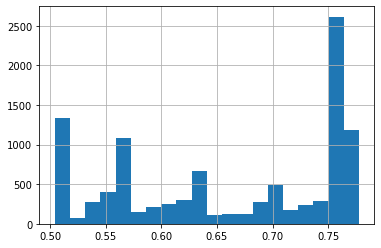

In [150]:
# MV: Un histograma de frecuencia para cada bin de test_score

df["mean_test_score"].hist(bins=20)

In [151]:
# MV: Esto me dio muy distinto al valor que traía el notebook, pero es de esperarse
clf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.02,
 'splitter': 'best'}

In [152]:
clf.best_estimator_.score(X_test,y_test)

0.7736363636363637

Train Score: 0.785223880597015
Test Score: 0.7736363636363637


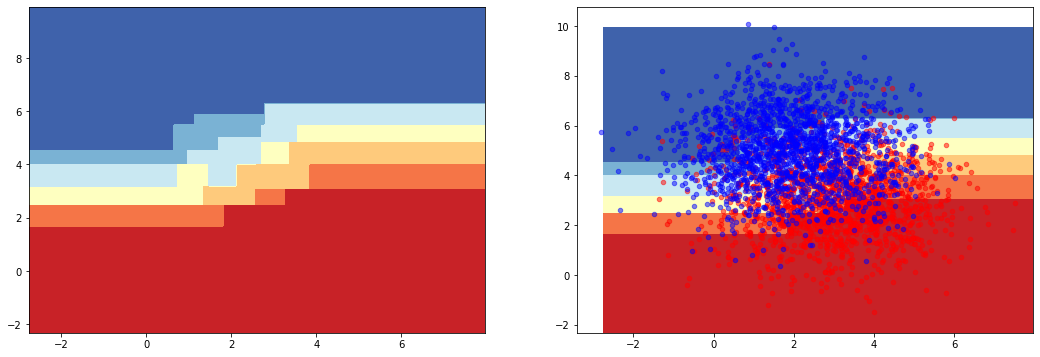

In [153]:
# MV Esto se puede escribir mejor del modo mostrado debajo

'''
MV Así lo escribieron originalmente:
gen_tree(X_train, y_train, X_test, y_test,
             criterion="gini",
             splitter="best",
             max_depth=20, 
             min_samples_split=4,
             min_samples_leaf=8,
             min_weight_fraction_leaf=0.02,
             max_features=1,
             max_leaf_nodes=100,
             min_impurity_decrease=0.,
             plot_tree=False)
'''
gen_tree(X_train, y_train, X_test, y_test,
             criterion=clf.best_params_["criterion"],
             splitter=clf.best_params_["splitter"],
             max_depth=clf.best_params_["max_depth"], 
             min_samples_split=clf.best_params_["min_samples_split"],
             min_samples_leaf=clf.best_params_["min_samples_leaf"],
             min_weight_fraction_leaf=clf.best_params_["min_weight_fraction_leaf"],
             max_features=clf.best_params_["max_features"],
             max_leaf_nodes=clf.best_params_["max_leaf_nodes"],
             min_impurity_decrease=clf.best_params_["min_impurity_decrease"],
             plot_tree=False)